<a href="https://colab.research.google.com/github/okaybuyukdeveci/Multiclass_food_classification_with_CNN-s/blob/main/Multiclass_food_classification_with_CNN's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class ımage classification

1 - becone one with the data

2 - preprocess the data( get it ready for a model)

3 - create a model (start with a baseline)

4 - fit the model (overfit it to make sure it works)

5 - Evaluate the model

6 - adjust different hyperparameters and improve the model (try to beat baseline/ overfitting )

7 - repeat until satisfieda



In [1]:
# import the data

import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# unzip the our data

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

--2024-11-04 16:52:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.207, 142.251.12.207, 172.217.194.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  21.6MB/s    in 24s     

2024-11-04 16:52:47 (20.6 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

# walk through 10 classes of food image data

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath} . ")

There are 2 directories and 0 images in 10_food_classes_all_data . 
There are 10 directories and 0 images in 10_food_classes_all_data/test . 
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen . 
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream . 
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak . 
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi . 
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings . 
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger . 
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry . 
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice . 
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon . 
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza . 
There are 

In [3]:
!ls - la 10_food_classes_all_data/

ls: cannot access '-': No such file or directory
ls: cannot access 'la': No such file or directory
10_food_classes_all_data/:
test  train


In [4]:
# setup the train and test directories

train_dir = "10_food_classes_all_data/train/"
test_dir =  "10_food_classes_all_data/test/"


In [5]:
# getting the class names

import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}")
  return img


In [7]:
# plot the validation and tranining curves seperately

def plot_loss_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy=history.history["accuracy"]
  val_accuracy= history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))
  #plot loss

  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();


['637374.jpg']
Image shape: (512, 512, 3)


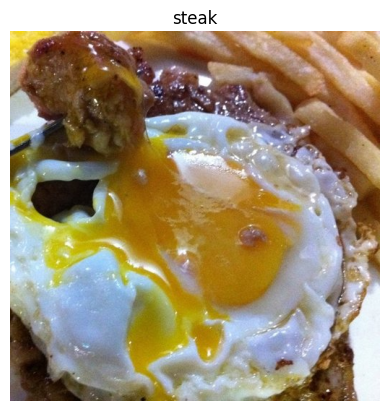

In [8]:
import random

img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

In [9]:
random.choice(class_names)

'hamburger'

In [10]:
# preprocess the data (prepare it for a model)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# rescale

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen  = ImageDataGenerator(rescale = 1/255.)

# load the data in from directories and turn it into batches

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size= 32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size=32,
                                             class_mode = "categorical")


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [11]:
 # create a model(start with a baseline)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Conv2D,Activation

 # create our model

model_8=  Sequential([
     Conv2D(10,3,input_shape=(224,224,3)),
     Activation(activation="relu"),
     Conv2D(10,3,activation="relu"),
     MaxPool2D(),
     Conv2D(10,3,activation="relu"),
     Conv2D(10,3,activation="relu"),
     MaxPool2D(),
     Flatten(),
     Dense(10,activation = "softmax")

 ])

# compile the model

model_8.compile(loss = "categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# fit the model
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=50,
                        validation_data=test_data,
                        validation_steps=50)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 195ms/step - accuracy: 0.6014 - loss: 1.2919 - val_accuracy: 0.3613 - val_loss: 1.9322
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.6143 - loss: 1.1859

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 320ms/step - accuracy: 0.6147 - loss: 1.1848 - val_accuracy: 0.3611 - val_loss: 2.0296
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 210ms/step - accuracy: 0.6707 - loss: 1.0411 - val_accuracy: 0.3294 - val_loss: 2.1971
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 313ms/step - accuracy: 0.6924 - loss: 0.9629 - val_accuracy: 0.3322 - val_loss: 2.1424
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.7416 - loss: 0.8392 - val_accuracy: 0.3281 - val_loss: 2.2807


In [23]:
# evaluate the model

model_8.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.3298 - loss: 2.3385


[2.2659966945648193, 0.3368000090122223]

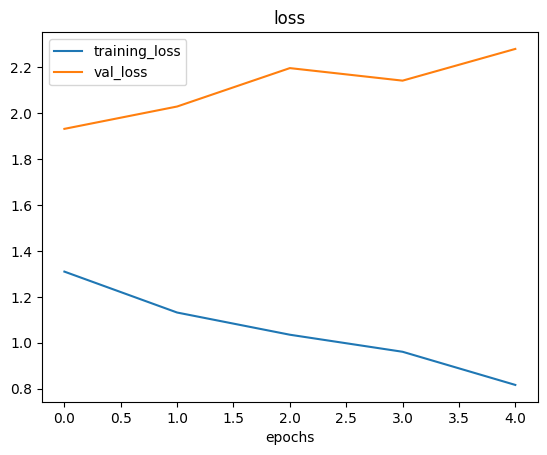

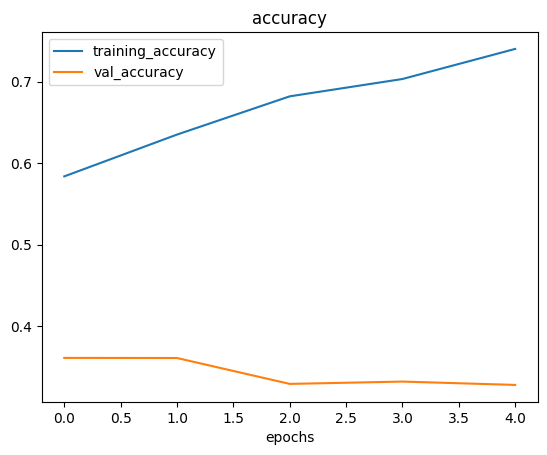

In [24]:
# check out the model's loss curves on the 10 classes

plot_loss_curves(history_8)

What do these loss curves tell us ?

It seems our model is overfitting the trainning set quite badly. in other words, its getting great results on the trainning data but fails to generalize well to unseen data an perfoms poorly on the test dataset.

In [15]:
# adjust the model hyperparameters (to beat the baseline/ reduce overfitting)

model_8.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │         280,910 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 851,762 (3.25 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 567,842 (2.17 MB)

In [16]:
model_9 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])
model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [17]:
model_9.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 29160)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │         291,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 292,800 (1.12 MB)

 Trainable params: 292,800 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model_8.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │         280,910 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 851,762 (3.25 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 567,842 (2.17 MB)

In [19]:
# fit the model with 2x conv layers removed

history_9= model_9.fit(train_data,
                       epochs=5,
                       steps_per_epoch=100,
                       validation_data=test_data,
                       validation_steps=100)

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 182ms/step - accuracy: 0.1673 - loss: 2.3021 - val_accuracy: 0.2268 - val_loss: 2.1220
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 151ms/step - accuracy: 0.2722 - loss: 2.0585 - val_accuracy: 0.2968 - val_loss: 1.9534
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.3451 - loss: 1.8493 - val_accuracy: 0.2848 - val_loss: 1.9968
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 154ms/step - accuracy: 0.3957 - loss: 1.7581 - val_accuracy: 0.2988 - val_loss: 1.9771
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 151ms/step - accuracy: 0.4512 - loss: 1.6497 - val_accuracy: 0.3020 - val_loss: 2.0205


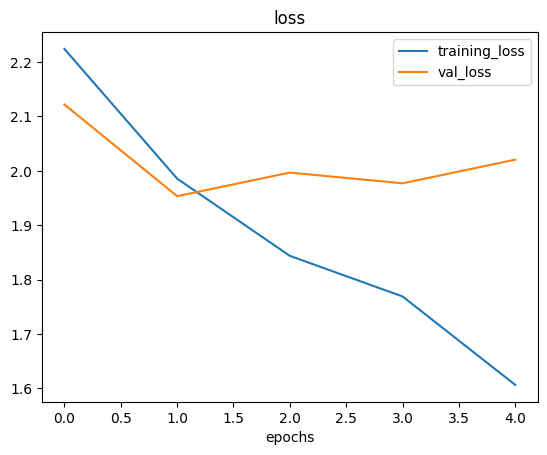

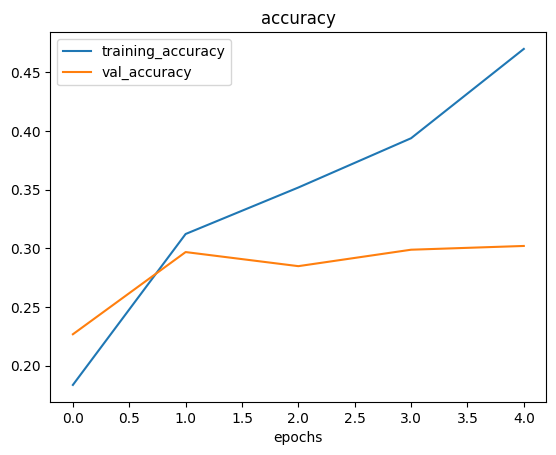

In [20]:
plot_loss_curves(history_9)

In [38]:
# trying to reduce overfitting with data augmentation

# create an augmented data generator instance

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True
                                             )

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [39]:
model_10 = tf.keras.models.clone_model(model_8)

model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])


In [40]:
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=60,
                          validation_data=test_data,
                          validation_steps=60)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


60/60 ━━━━━━━━━━━━━━━━━━━━ 37s 526ms/step - accuracy: 0.0979 - loss: 2.2967 - val_accuracy: 0.1849 - val_loss: 2.2374
Epoch 2/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step - accuracy: 0.1632 - loss: 2.2337

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


60/60 ━━━━━━━━━━━━━━━━━━━━ 35s 593ms/step - accuracy: 0.1632 - loss: 2.2336 - val_accuracy: 0.2034 - val_loss: 2.1703
Epoch 3/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 31s 517ms/step - accuracy: 0.2021 - loss: 2.1773 - val_accuracy: 0.2604 - val_loss: 2.0590
Epoch 4/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 299ms/step - accuracy: 0.2525 - loss: 2.1365 - val_accuracy: 0.2759 - val_loss: 1.9872
Epoch 5/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 34s 520ms/step - accuracy: 0.2576 - loss: 2.1156 - val_accuracy: 0.3099 - val_loss: 1.9794


In [42]:
model_8.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step - accuracy: 0.3367 - loss: 2.2674


[2.2659964561462402, 0.3368000090122223]

In [43]:
model_10.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - accuracy: 0.3120 - loss: 1.9849


[1.9755321741104126, 0.3131999969482422]

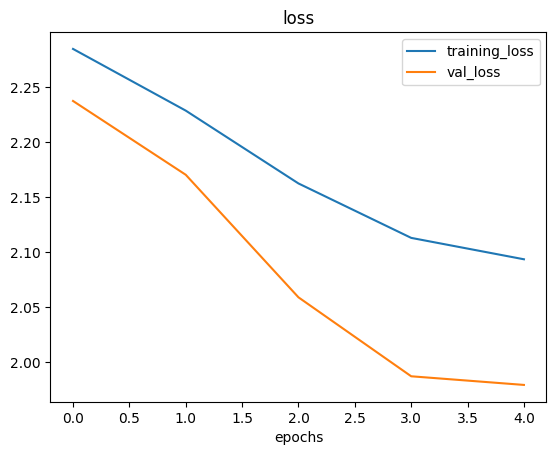

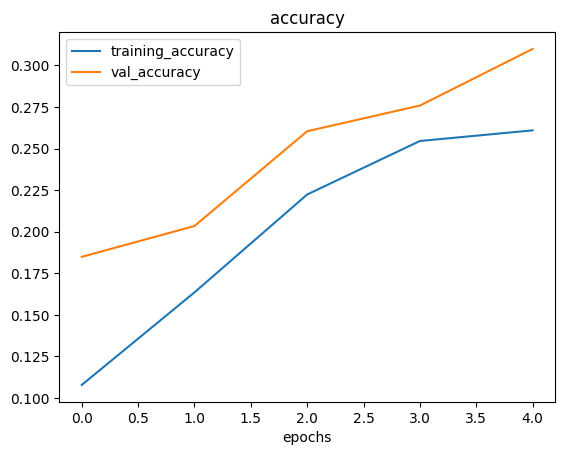

In [44]:
plot_loss_curves(history_10)

# Repeat until satisfied

Trying to to bring our loss curves closer together and trying to improve the validation/ test accuracy.

How ?

restructuring our model's architecture(increasing layers/hidden units)

adjust the learning rate

try different methods of data augmentation

trainning for longer(10 epochs instead of 5 epochs)

try transfer learning

In [51]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename,
  turns it into a tensor and reshapes it to (img_shape, img_shape, color_channels)
  """

  img = tf.io.read_file(filename)
  img=tf.image.decode_image(img)
  img=tf.image.resize(img,size=[img_shape,img_shape])
  img=img/255.
  return img


In [75]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title.
  """

  #import the target image and preprocess it
  img = load_and_prep_image(filename)

  #make a prediction
  pred=model.predict(tf.expand_dims(img,axis=0))

  # add inlogic dor multi-class & get pred_class_name

  if len(pred[0])>1:
    pred_class=class_names[tf.argmax(pred[0])]
  else:
    pred_class=class_names[int(tf.round(pred[0]))]

  print(pred)
  print(pred_class)


  # plot the image and predicted class
  plt.imshow(img)
  plt.title(f"prediction: {pred_class}")
  plt.axis(False);

In [46]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-sushi.jpeg

--2024-11-04 17:39:19--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2024-11-04 17:39:20 (234 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

--2024-11-04 17:39:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP r

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
[[0.04479024 0.03155566 0.16882196 0.07448385 0.10498951 0.10140278
  0.1315105  0.2075542  0.05126974 0.08362158]]
ramen


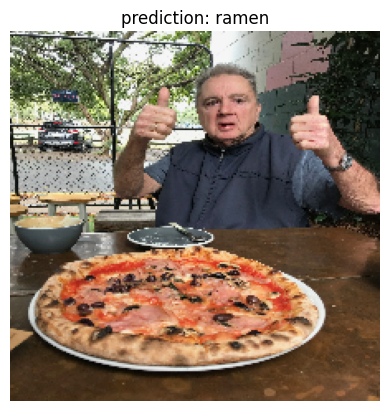

In [77]:
# Making a prediction with our trained model

pred_and_plot(model=model_10,
              filename="03-pizza-dad.jpeg",
              class_names=class_names)

In [79]:
# saving and loading our model

model_10.save("saved_trained_model_10.keras")


In [81]:
# load in a trained model and evaluate it

loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10.keras")
loaded_model_10.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - accuracy: 0.3166 - loss: 1.9593


[1.9755330085754395, 0.3131999969482422]

In [83]:
model_10.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 153ms/step - accuracy: 0.3083 - loss: 1.9963


[1.9755330085754395, 0.3131999969482422]